<a href="https://colab.research.google.com/github/KatherinReyes06/Topicos_En_Estadistica/blob/main/Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daremos solución a la tarea 5 del curso de tópicos en estádistica

## Punto 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving fetal2020.csv to fetal2020.csv


In [16]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-16-69413e57e52c>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [17]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)

<ipython-input-17-34b7e6819ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,nan,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,nan,1,1


In [18]:

df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = 6
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1


In [19]:
df.loc[(df.P_PMAN_IRIS == 6), 'P_PMAN_IRIS'] = 6.0
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)

<ipython-input-19-cf381b835ac2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)


In [20]:
df.P_PMAN_IRIS.unique()

array([6., 0., 5., 2., 1., 3.])

In [27]:
dummi1 = pd.get_dummies(df['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(df['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido"]
dummi3 = pd.get_dummies(df['T_GES'], dtype=float)
dummi3.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]


In [28]:
df.PESO_NAC = df.PESO_NAC.astype(str)
df.loc[(df.PESO_NAC == "3"), 'PESO_NAC'] = "< 1.5-2 Kg"
df.loc[(df.PESO_NAC == "1"), 'PESO_NAC'] = "< 1 Kg"
df.loc[(df.PESO_NAC == "2"), 'PESO_NAC'] = "1-1.5 Kg"
df.loc[(df.PESO_NAC == "4"), 'PESO_NAC'] = "2-2.5 Kg"
df.loc[(df.PESO_NAC == "5"), 'PESO_NAC'] = "2.5-3 Kg"
df.loc[(df.PESO_NAC == "6"), 'PESO_NAC'] = "3-3.5 Kg"
df.loc[(df.PESO_NAC == "7"), 'PESO_NAC'] = "3.5-4 Kg"
df.loc[(df.PESO_NAC == "8"), 'PESO_NAC'] = "> 4 Kg"
df.loc[(df.PESO_NAC == "9"), 'PESO_NAC'] = "Kg desco"
print(df)

          SEXO  P_PMAN_IRIS    PESO_NAC  T_GES
COD_DPTO                                      
70           3          6.0    Kg desco      1
11           3          0.0      < 1 Kg      1
11           1          0.0      < 1 Kg      2
11           3          6.0      < 1 Kg      1
11           2          6.0  < 1.5-2 Kg      3
...        ...          ...         ...    ...
41           3          6.0      < 1 Kg      1
11           3          6.0    Kg desco      1
11           3          0.0    Kg desco      1
76           3          6.0      < 1 Kg      1
11           3          0.0      < 1 Kg      1

[33327 rows x 4 columns]


<ipython-input-28-2a0d6ed23dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PESO_NAC = df.PESO_NAC.astype(str)


## Creación de la matriz Dummie

In [30]:
dummi = pd.concat([dummi1, dummi2, dummi3, df.PESO_NAC], axis=1)
dummi.head(4)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Kg desco
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,< 1 Kg
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg


In [32]:
x1 = dummi.drop("PESO_NAC", axis=1)
y1 = dummi["PESO_NAC"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.3)
train2

COD_DPTO
76      < 1 Kg
52      < 1 Kg
11      < 1 Kg
68      < 1 Kg
11    1-1.5 Kg
        ...   
95      < 1 Kg
73      < 1 Kg
70    Kg desco
76      < 1 Kg
5       < 1 Kg
Name: PESO_NAC, Length: 23328, dtype: object

En este primer punto hemos hecho un tratamiento de datos con el objetivo de construir nuestra matriz dummi y poder obtener los datos de entrenamiento y validación para nuestro modelo

## Punto 2

In [33]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf1.fit(train1, train2)


MLPClassifier(hidden_layer_sizes=(14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                                  14, 14, 14, 14, 14),
              max_iter=500)

## Punto 3: Matriz de confusión y curva de *perdida*

In [34]:
y_pred1 =  pd.DataFrame(mlp_clf1.predict(test1))
y_pred1.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred1)))

Exactitud: 0.75


In [36]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(test2, y_pred1)

Text(0.5, 1.0, 'Confusion Matrix')

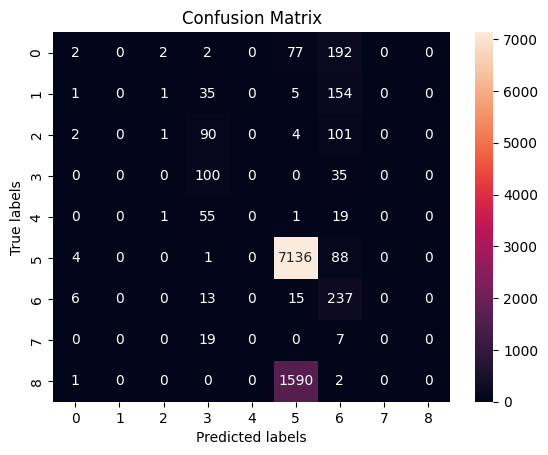

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

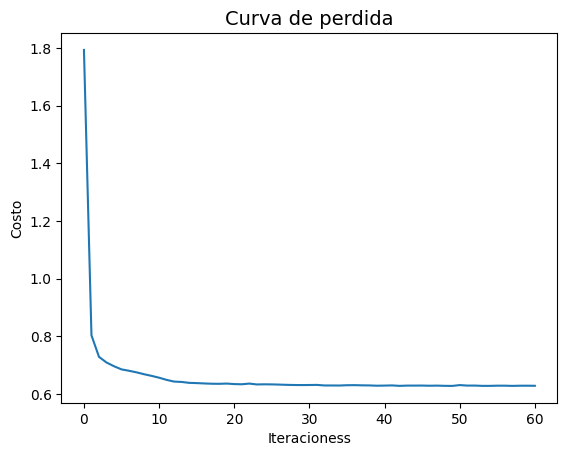

In [38]:
plt.plot(mlp_clf1.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

Construimos nuestro modelo y verificamos que tan eficiente sería nuestro modelo para predecir el peso en kg de un bebé al momento de su fallecimiento.

Con ayuda de la matriz de confusión, la exactitud de nuestra predicción y la curva de perdida podemos notar que nuestro modelo no es adecuado para nuestros datos, pues en la matriz de confusión podemos observar nuestra diagonal en su mayoria son ceros y nuestro ajuste es tan solo del 75% y el modelo se ajusta de buena forma en el intervalo de peso 2.5 - 3 kg, adicionalmente podemos evidenciar que para 3 y 6 nuestro podemos tiene pocos aciertos, nuestra predicción no es confiable

## Punto 4

Supongamos que un bebé es considerado con bajo al momento de su muerte si tiene un peso <2 kg

In [50]:
no_obs = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
mlp_clf1.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [51]:
no_obs1 = np.array([[0, 1, 0, 0, 1, 0, 0, 0, 0,0, 0, 1, 0, 0, 0]])
mlp_clf1.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1.5-2 Kg'], dtype='<U10')

In [52]:
no_obs2 = np.array([[0, 0, 1, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 0, 1]])
mlp_clf1.predict(no_obs2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [53]:
no_obs3 = np.array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]])
mlp_clf1.predict(no_obs3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [54]:
no_obs4 = np.array([[1, 0, 0, 0, 0, 0, 0, 1, 0,0, 1, 0, 0, 0, 0]])
mlp_clf1.predict(no_obs4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [63]:
no_obs5 = np.array([[1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 0, 1, 0, 0]])
mlp_clf1.predict(no_obs5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['3-3.5 Kg'], dtype='<U10')

Realizando un breve análisis y jugar con nuestro datos podemos ver que el peso en kg de un bebé al momento de fallecer es indiferente de su genero y causa de muerte, sin embargo podemos decir que las semanas de nacido si pueden afectar el peso del bebé al momento de fallecer, para ello veamos que el ejemplo 5 nos dice que un varón con causa de muerte indeterminada y nacido entre la semana 38-41 tiene un buen peso al momento de su fallecimiento.

In [56]:
dummi.head(2)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Kg desco
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg


## Punto 5

Duplicaremos nuestras capas ocultas con la misma cantidad de nodos, verificando si nuestro modelo tiene alguna mejora.

In [64]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf2.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                                  14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                                  14, 14, 14, 14, 14, 14, 14, 14, ...),
              max_iter=500)

In [65]:
y_pred2 =  pd.DataFrame(mlp_clf2.predict(test1))
y_pred2.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred2)))

Exactitud: 0.75


Gracias a la exatitud podemos verificar que nuestro modelo no presenta ninguna mejora para las predicciones, podriamos seguir jugando con nuestras capas ocultas y nuestra cantidad de nodos con el fin de buscar una mejor aproximación o realizar ajustes a las variables que usamos para nuestro modelo ya sea agregando o quitando variables.

Enlace de github: https://github.com/KatherinReyes06/Topicos_En_Estadistica/blob/main/Tarea_5.ipynb